Role: Machine Learning Engineer -
Initial Screening round

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
scr=pd.read_csv("/content/scr-dataset.csv")
scr

,x,y
0,1.0,1.750768
1,1.1,1.699704
2,1.2,1.607502
3,1.3,1.479060
4,1.4,1.320438
...,...,...
435,44.5,1.354955
436,44.6,1.523446
437,44.7,1.648505
438,44.8,1.727490


In [3]:
scr.head()

,x,y
0,1.0,1.750768
1,1.1,1.699704
2,1.2,1.607502
3,1.3,1.479060
4,1.4,1.320438


In [5]:
scr.describe()

,x,y
count,440.000000,440.000000
mean,22.950000,0.000708
std,12.716131,1.001561
min,1.000000,-1.760149
25%,11.975000,-0.571808
50%,22.950000,-0.002649
75%,33.925000,0.592413
max,44.900000,1.760160


In [6]:
scr.isnull().sum()

x    0
y    0
dtype: int64

To check for the assumptions of linear regression, such as linearity, homoscedasticity, independence, and normality, we can use several methods and visualizations.

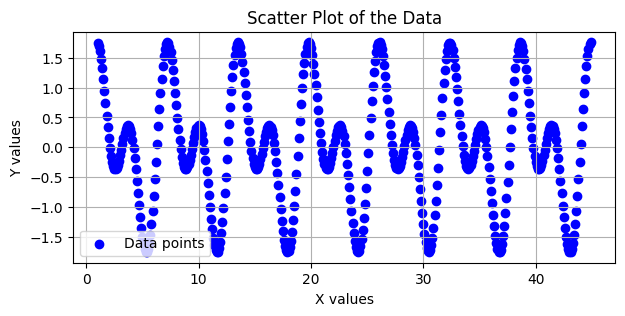

In [26]:
# Visualizing the data
plt.figure(figsize=(7, 3))
plt.scatter(scr['x'], scr['y'], color='blue', label='Data points')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot of the Data')
plt.legend()
plt.grid(True)
plt.show()

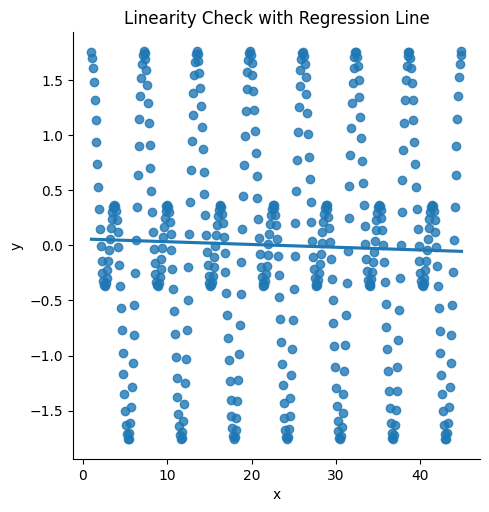

In [12]:
# Checking linearity using scatter plot
sns.lmplot(x='x', y='y', data=scr, ci=None)
plt.title('Linearity Check with Regression Line')
plt.show()

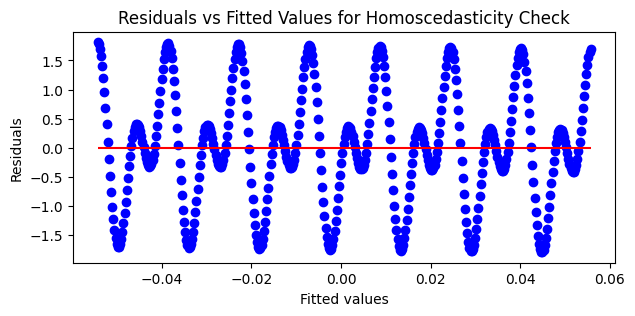

In [27]:
# Checking for homoscedasticity
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(scr[['x']], scr['y'])
predictions = model.predict(scr[['x']])
residuals = scr['y'] - predictions

plt.figure(figsize=(7, 3))
plt.scatter(predictions, residuals, color='blue')
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), color='red')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values for Homoscedasticity Check')
plt.show()

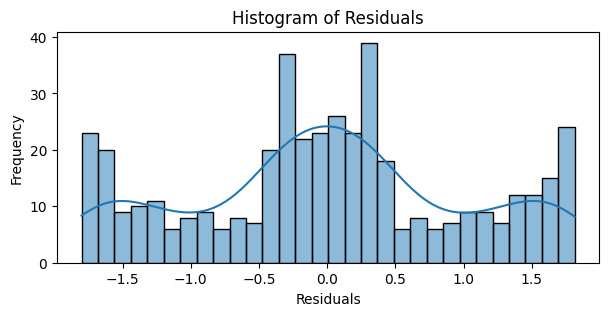

In [28]:
# Check for normality of residuals
plt.figure(figsize=(7, 3))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Check for independence (Durbin-Watson test)
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 0.024923396075937833


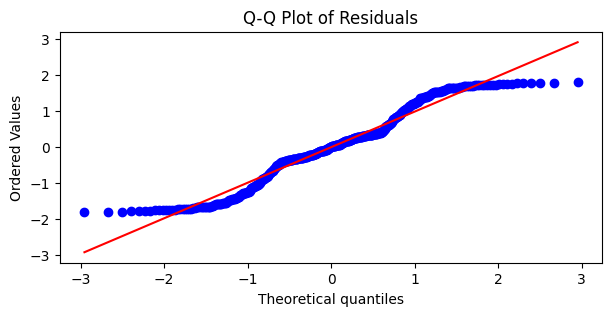

In [29]:
# QQ-plot
from scipy import stats
plt.figure(figsize=(7, 3))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

The data points are not following a linear trend. Hence it is less appropriate to use Linear Regression model. The scatter plot or the data that is being scattered suggests that the data follows periodic or cyclic relationship. This means that a more complex model, such as a polynomial regression or a sinusoidal model, might be more suitable to fit the data.

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [19]:
# Fitting a polynomial regression model
degree = 4  # You can adjust the degree of the polynomial to better fit the data
polynomial_features = PolynomialFeatures(degree=degree)
x_poly = polynomial_features.fit_transform(scr[['x']])

model = LinearRegression()
model.fit(x_poly, scr['y'])

LinearRegression()

In [20]:
# Generating predictions
y_poly_pred = model.predict(x_poly)

In [24]:
# Evaluating the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2 = r2_score(scr['y'], y_poly_pred)
mse = mean_squared_error(scr['y'], y_poly_pred)
mae = mean_absolute_error(scr['y'], y_poly_pred)

print(f'R² score: {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

R² score: 0.007802114949806649
Mean Squared Error (MSE): 0.9930358873788873
Mean Absolute Error (MAE): 0.7943482220380247


In [22]:
# Predicting the value of y at x = 50
x_new_poly = polynomial_features.transform(np.array([[50]]))
y_pred = model.predict(x_new_poly)
print(f'Predicted value of y at x = 50: {y_pred[0]}')

Predicted value of y at x = 50: 0.5846796963324122


Overall, the R-squre score of 0.0078 means that the polynomial regression model explains only about 0.78% of the variance in the 'y' values based on the 'x' values. This suggests that the model is not a good fit for the data.

An MSE of 0.9930 indicates that, on average, the square of the prediction errors is around 0.9930. This value suggests that the predictions are not very close to the actual values, which aligns with the low R² score. An MAE of 0.7943 indicates that, on average, the absolute difference between the actual and predicted values is about 0.7943. This value gives us a sense of the typical error magnitude.

The low R-squre score and relatively high MSE and MAE values indicate that the polynomial regression model does not fit the data well. The data points do not follow a clear polynomial trend, making it challenging for the model to capture the underlying pattern. We can make further steps like using transformation of the data either x or y to prevent in providing the low R-square score.